# Chaînes de Markov : propagation d’une épidémie dans une population
Groupe 3

**Haya MAMLOUK** - 21107689

**Maeva RAMAHATAFANDRY** - 21104443


## 1. Description du premier modèle

1. Dans le cadre de ce modèle épidémique:
- il y'a 3 états: **Sain (S), Infecté (I) et Guéri (R)**. 
- Le vecteur de probabilité initiale est de taille 3 représentant chaque état au temps 0. 
- La matrice de transition est de taille 3 x 3: on peut rentrer selon 3 états (S, I , R) et sortir selon 3 états. 

2. pi0 : vecteur de probabilité initiale:


``` python
    pi0 = [0.9, 0.1, 0.0]
```


3. Matrice de transition 1 contenant les probabilités de transition entre les différentes états:

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])
```



In [6]:
# PARAMÈTRES DU CODE
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

pi0 = [0.9, 0.1, 0.0]

A = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])


In [7]:
def est_stochastique(A):
    """
    Cette fonction renvoie 1 si A est une matrice stochastique (matrice carrée et la somme des éléments d'une ligne  = 1) et 0 sinon

    Parameteres
    ----------
    A : np.array
    Matrice à vérifier

    Returns
    --------
    boolean : True si A stochastique, False sinon

    """
    sum : int = 0
    if A.shape[0] == A.shape[1]: 
        for i in A: #i = valeur ligne, j = valeur colonne
            for j in i:
                sum += j
            if sum != 1:
                return False
            else :
                sum = 0
        return True
    return False

assert(est_stochastique(A) == True)


### 1.1 Distribution théorique

1. Calcul de la distribution théoriques des états pour t = 1

La probabilité pour un individu d'être **Sain** au temps t = 1 est:

$ P(S_1) = P(S_1 | S_0) * P(S_0) = 0.9 * 0.92 = 0.828 $


La probabilité pour un individu d'être **Infecté** au temps t = 1 est: 

$   P(I_1) = P(I_1| S_0) * P(S_0) + P(I_1 | I_0) * P(I_0) = 0.08 * 0.9 + 0.93 * 0.1  = 0.072 + 0.093 = 0.165 $


La probabilité pour un individu d'être **Guéri** au temps = 1 est:

$   P(R_1) = P(R_1 | I_0) * P(I_0) = 0.07 * 0.1 = 0.007 $


2. Calcul de la distribution théoriques des états pour t = 2

La probabilité pour un individu d'être **Sain** au temps t = 2 est:

$   P(S_2) = P(S_2 | S_1) * P(S_1) =  0.92 * 0.828 = 0.762 $ 


La probabilité pour un individu d'être **Infecté** au temps t = 2 est: 

$   P(I_2) = P(I_2| S_1) * P(S_1) + P(I_2 | I_1) * P(I_1) = 0.08 * 0.828 + 0.93 * 0.165 = 0.06624 + 0.15345 = 0.21969 $


La probabilité pour un individu d'être **Guéri** au temps = 1 est:

$   P(R_2) = P(R_2| I_1) * P(I_1) + P(R_2 | R_1) * P(R_1) = 0.07 * 0.165 + 0.007 * 1 = 0.01855 $


3. Calcul des distributions théoriques des états pour t entre 1 et 200

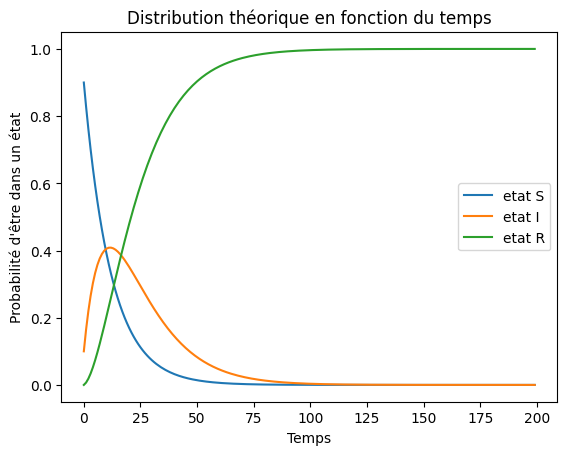

In [21]:
def distribution_etat(A, vect_init):
    """
    Calcul la distribution théorique des effectifs dans chaque état pour chaque temps t entre 1 et 200

    Parameters
    ----------
    A : Matrice de probabilités de transition
    vect_init : Vecteur de probabilités initiales

    Returns
    -------
    liste_distribution : Liste des distribution théorique pour chaque temps t
    """
    liste_distribution = []
    liste_distribution.append(np.array(vect_init))

    for i in range(1, 200): 
        liste_distribution.append(np.dot(liste_distribution[i-1], A)) # pi(t+1) = pi(t) * A

    return liste_distribution

def affichage_distribution(liste_distribution, title, xlabel, ylabel) :
    """
    Affiche le graphe des distributions

    Parameters
    ----------
    liste_distribution : Liste de distribtutions en fonction du temps
    title : Titre du graphe
    xlabel : Étiquette de l'axe des absicess
    ylabel : Étiquette de l'axe des ordonnées

    """
    plt.plot(liste_distribution , label=['etat S', 'etat I', 'etat R'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

liste_distribution = distribution_etat(A, pi0)
affichage_distribution(liste_distribution, 'Distribution théorique en fonction du temps', 'Temps', "Probabilité d'être dans un état")

### 1.2 Distibution Observée
#### 1.2.1 Tirage aléatoire des états

In [22]:
def seq_alea_individu(T, pi0, transition) :
    """
    Génére une séquence aléatoire de taille T pour un individu à partir d'une chaîne de Markov.

    Parameters
    ---------
    T : taille de la séquence (le temps)
    pi0 : vecteur de probabilités initiales
    transition : Matrice de probabilités de transition

    Returns 
    -------
    res : liste d'états successives 

    """

    states  = ['S', 'I', 'R']
    res = [random.choices(states, weights=pi0, k=1)[0]] # on commence par un état avec une proba initiale

    transition_weights = {'S': transition[0], 'I': transition[1], 'R': transition[2]}

    for i in range(1, T + 1):
        current_state = res[i - 1]
        next_state = random.choices(states, weights=transition_weights[current_state], k=1)[0]
        res.append(next_state)
    return res
    
print(seq_alea_individu(150, pi0, A))

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'I', 'I', 'I', 'I', 'I', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


#### 1.2.2 Modélisation d’une population
1. Nombre d'individus sains, infectés et guéris et répartition de la population

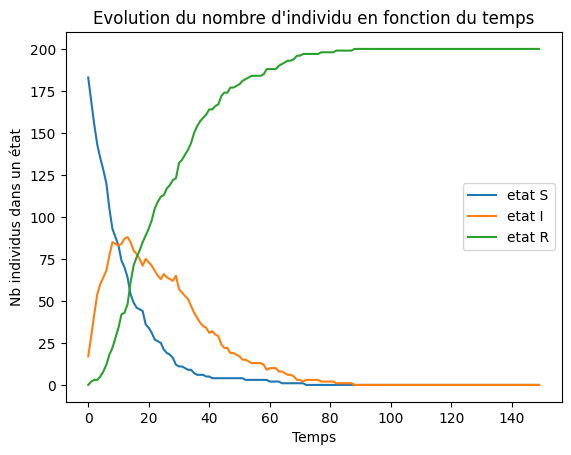

In [26]:
def seq_alea_population(nb_individus, T, pi0, A):
    """
    Génére des séquences aléatoires de taille T pour une population (de nb_individus individus) à partir d'une chaîne de Markov.

    Parameters
    ---------
    nb_individus : taille de la population
    T : taille de la séquence (le temps)
    pi0 : vecteur de probabilités initiales
    transition : Matrice de probabilités de transition

    Returns
    -------
    res : liste de séquences aléatoires

    """
    return [seq_alea_individu(T, pi0, A) for _ in range(nb_individus)]

def distribution_population(seq_population : list(list()), T, nb_individus):
    """
    Compte le nombre d'individus sains, infectés et guéris dans la population à chaque pas de temps.

    Parameters
    ----------
    seq_population : liste de séquences aléatoire d'une population
    T : taille de la séquence (le temps)
    nb_individus : taille de la population
    
    Returns
    ------
    res : liste de listes du nombre d'invidus de chaque etat pour chaque temps t
    """
    res = []

    for j in range(T):
        tab_temps = np.zeros(3)
        for i in range(nb_individus):
            if seq_population[i][j] == 'S':
                tab_temps[0] += 1
            elif seq_population[i][j] == 'I':
                tab_temps[1] += 1
            else:
                tab_temps[2] += 1
        res.append(tab_temps)
        
    return res

#tests
population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
affichage_distribution(distribution, "Evolution du nombre d'individu en fonction du temps", 'Temps', "Nb individus dans un état")

2. Affichage des pourcentages

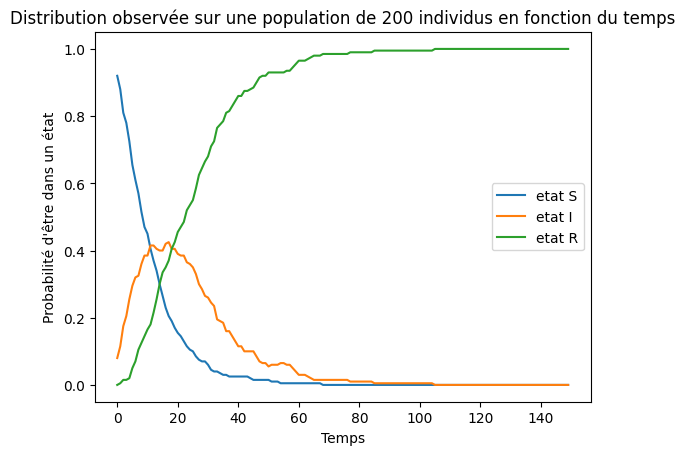

In [31]:
def pourcentages_population(repartition_population, nb_individus):
    """
    Affiche le pourcentage d'indivudus sains infectés et guéris en fonction du temps.

    Parameters
    ---------
    repartition_populations : liste de listes du nombre d'invidus de chaque etat pour chaque temps t
    nb_individus : taille de la population

    Returns 
    -------
    liste de listes du pourcentage des individus de chaque etat pour chaque temps t
    """
    for temps in repartition_population:
        for i in range(3):
            temps[i] /= nb_individus
    return repartition_population

population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
pourcentages = pourcentages_population(distribution, 200)
affichage_distribution(pourcentages,'Distribution observée sur une population de 200 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état" )

3. Nous remarquons quand T est grand, la population coverge vers Guéri, donc la majorité (totalité si T tres grand) des individus sont devenus Infectés et puis Guéris. Le nombre de Sains et d'Infectés devient presque nul (ou nul), ce qui est cohérent avec les probabilités de transitions (si on est Guéri, on ne change plus d'états, et on devient guéri que si on est infecté).

4. expérience avec une population de 5 individus et 5000

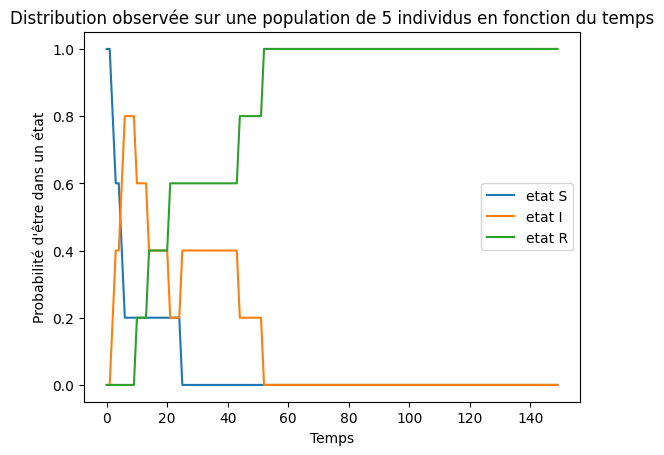

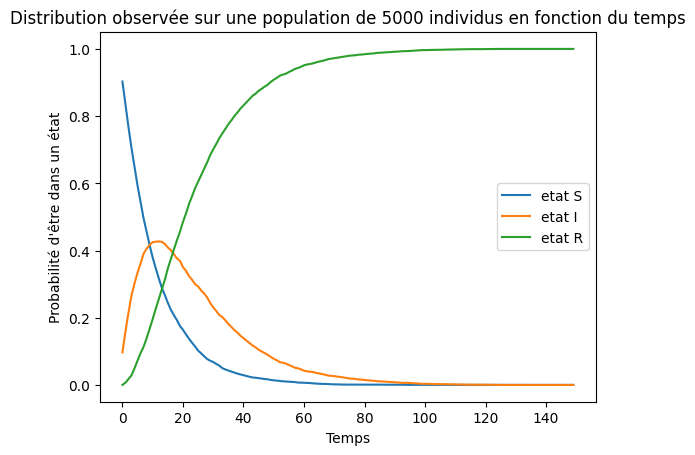

In [33]:
def simulation(nb_individus, T, A):
    """
    Simule des experiences pour une population

    Parameters
    ----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)
    A : Matrice de probabilités de transition

    Returns
    -------
    pourcentages : liste de listes de pourcentages de chaque etats pour chaque temps t
    """
    population = seq_alea_population(nb_individus, T, pi0, A) # créer une pop aléa avec A
    distribution = distribution_population(population, T, nb_individus) # compte nb d'individu pour chaque état
    pourcentages = pourcentages_population(distribution, nb_individus) # calcul le pourcentage de chaque etat
    return pourcentages

# avec 5 individus:
affichage_distribution(simulation(5, 150, A), 'Distribution observée sur une population de 5 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()

# avec 5000 individus
affichage_distribution(simulation(5000, 150, A), 'Distribution observée sur une population de 5000 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()

Nous remarquons que les pourcentages commencent à converger vers les valeurs indiquées (cf question 3) aux alentours de t=50, que cela soit pour une population de taille 50 ou 5000. Cela montre, que quelque soit la taille d'une population, nous avons besoin d'environ 50 pas de temps pour que la majorité de la population ait deja passé de Sain à Infecté, et de Infecté à Guéri. La transition entre Infecé et Guéri commence à environ t=25. 

## 1.3 Longueur de l'infection
1. Longueur moyenne d'une séquence de I

In [37]:
def longueur_I_obs(nb_individus, T):
    """
    Estime la longueur moyenne d'une séquence de I consécutifs pour une population observée

    Parameters
    ----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)

    Returns
    -------
    la moyenne, liste du nombre de I consécutifs de chaque individu
    """
    I_moyen = []
    pop = seq_alea_population(nb_individus, T, pi0, A) # on genere une population aléa
    
    for i in range(nb_individus):
        total_inf = 0 
        for j in range(T):
            seq_inf = [etat for etat in pop[i][j] if etat == 'I'] 
            inf = len(seq_inf)
            total_inf += inf  #nb seq 'I' pour chaque individu
       
        I_moyen.append(total_inf)  

    return statistics.mean(I_moyen), I_moyen

print(longueur_I_obs(150, 200))

(14.326666666666666, [6, 1, 7, 6, 11, 5, 7, 7, 12, 11, 161, 76, 8, 15, 35, 3, 25, 4, 17, 51, 5, 4, 2, 25, 11, 3, 17, 1, 3, 8, 39, 20, 3, 1, 12, 18, 16, 6, 16, 18, 11, 1, 1, 14, 21, 5, 12, 24, 6, 1, 16, 6, 8, 26, 28, 2, 3, 40, 7, 11, 14, 19, 19, 16, 20, 13, 25, 3, 9, 31, 5, 1, 6, 4, 4, 11, 32, 22, 8, 15, 37, 12, 20, 18, 16, 7, 5, 2, 3, 22, 11, 41, 2, 2, 10, 18, 78, 12, 16, 5, 10, 13, 17, 12, 4, 11, 12, 5, 25, 27, 8, 28, 16, 6, 11, 14, 10, 25, 6, 1, 2, 9, 10, 11, 17, 3, 9, 9, 3, 10, 5, 2, 16, 15, 2, 2, 4, 26, 7, 4, 3, 23, 10, 14, 2, 19, 27, 15, 16, 40])


2. Longueur théorique d'une séquence I <br>
La longueur théorique d'une séquence I peut être modélisée par une loi géométrique tel que la probabilité de succès est associée à la probabilité de passer de I à R.<br>
Soit L une variable aléatoire représentant la longueur d'une séquence, donc le nombre de I dans une séquence.<br>
P(L=1) = P(R|I) = 0.07 (être infecté une seule fois) <br>
P(L=2) = P(I|I) x P(R|I) = 0.93 x 0.07 (être infecté deux fois de suite)<br>
P(L=3) = $P(I|I)^2$ x P(R|I) = $0.93^2$ x 0.07 (être infecté trois fois de suite)<br>
P(L=k) = $P(I|I)^{k-1} $ x P(R|I) = $0.93^{k-1}$ x 0.07 (être infecté k fois de suite)<br>
<br>
Pour trouver la moyenne de la longueur théorique, on calcule donc l'espérance de la loi géométrique de paramètres 0.07. La probabilité de succes, passer de I à R, est de 0.07 .<br>
$Longueur moyenne = 1/0.07 = 14.28$

3. Comparaison de la longueur moyenne observée et de la longueur moyenne​ théorique <br>
On peut remarquer que la longueur moyenne observée et la longueur moyenne théorique se rapprochent avec une petite différence , la valeur observée environant 14 et la valeur théorique 14.28.
4. Distribution observée de la longueur d'infection

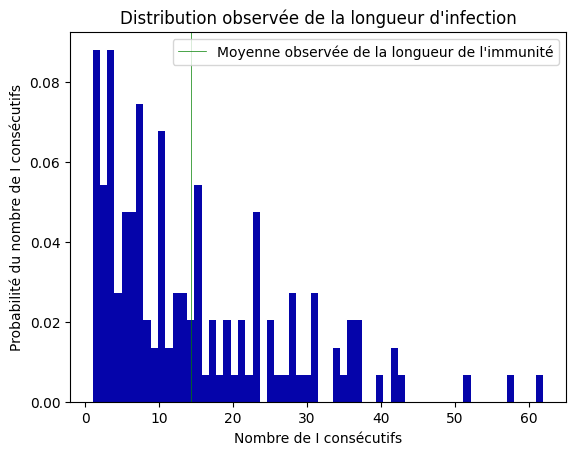

In [59]:
def hist_longueur_I_obs(nb_individus, T):
    """
    Affiche la distribution observée de la longueur d'infection

    Parameters
    ----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)
    """
    # population observée
    moyenne,occurrences = longueur_I_obs(nb_individus, T)
    plt.title("Distribution observée de la longueur d'infection")
    plt.xlabel("Nombre de I consécutifs")
    plt.ylabel("Probabilité du nombre de I consécutifs")
    plt.axvline(moyenne, color='g', linewidth=0.5, label="Moyenne observée de la longueur de l'immunité") # moyenne observée
    plt.hist(occurrences, bins=max(occurrences), density=True, color='#0504aa')
    plt.legend()

hist_longueur_I_obs(150,200)

Le nombre de I consécutifs le plus fréquents est compris entre 0 et 10. La moyenne est aux alentours de 14. Cela implique que même si la moyenne est de 14, la majorité des individus restent infectés pendant moins de 10 pas de temps.

5. Distribution théorique et distribution observée

1. Courbe théorique

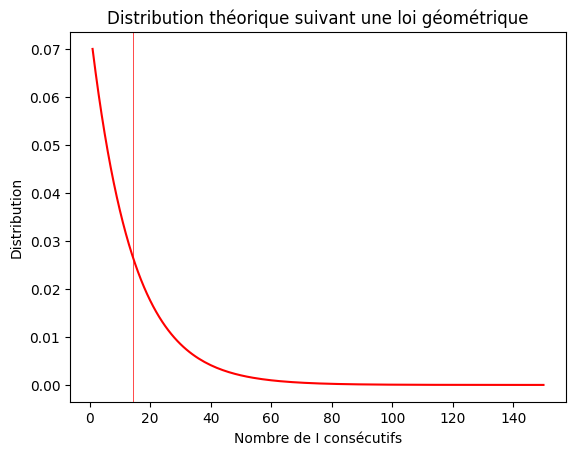

In [60]:
def geometrique(p, k):
    """
    Calcul P(X=k) avec X qui suit une loi géométrique

    Parameters
    ----------
    p : probabilité de succes
    k : nombre d'essaie

    Returns 
    -------
    P(X=k)
    """
    return (1 - p)**(k - 1) * p

def courbe_dist_theorique(temps, p):
    """
    Affiche la courbe de la loi géométrique de parametre p

    Parameters
    ----------
    temps : le temps de l'experience
    p : probabilité de succes
    """
    list_distribution = [geometrique(p,k) for k in range(1,temps+1)]
    x = np.arange(1,len(list_distribution)+1)
    y = list_distribution
    plt.plot(x, y, color='red')
    plt.axvline((1/p), color='r', linewidth=0.5, label="Moyenne théorique de la longueur de l'immunité") #moyenne théorique

    plt.title('Distribution théorique suivant une loi géométrique')
    plt.xlabel('Nombre de I consécutifs')
    plt.ylabel("Distribution")

courbe_dist_theorique(150, 0.07) 
    

2. Comparaison des distributions

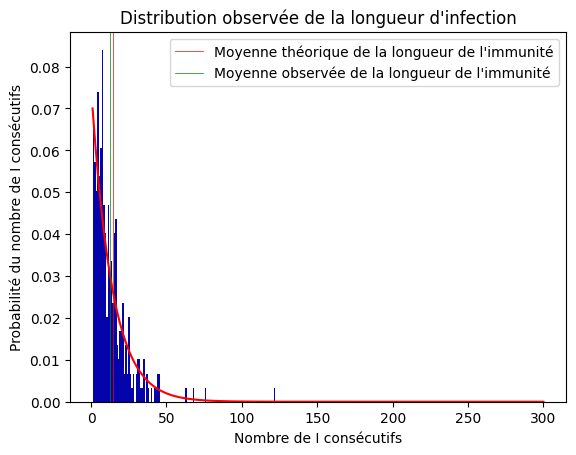

In [70]:
def distribution_long_I_comp(nb_individus, temps, p):
    courbe_dist_theorique(temps, p)
    hist_longueur_I_obs(temps, nb_individus)

distribution_long_I_comp(5000, 300, 0.07)

Les distributions théorique et observée se superposent étroitement. Ceci indique que la probabilité de transition de l'état Infecté (I) à l'état de Guéri (R) suit effectivement une loi géométrique.

## 2. Description du second modèle
### 2.1 Analyse du modèle

1. La propriété de Markov d'ordre 1 est vérfiée. Le processus est aléatoire dans un temps discret avec un nombre fini d'états. Nous pouvons bien passer d'un état à un autre. Donc, ce processus peut être modélisé par une chaîne de Markov.

2. Matrice de transition 2 contenant les probabilités de transition entre les différentes états :

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
``` 
Cette matrice est bien stochastique.

3. Les états de cette chaîne de Markov sont récurrents, nous sommes sûrs de retourner sur un état à un temps donné. La chaîne est bien apériodique (self loop), et tous les états sont communiquants donc elle est irréductible. La chaîne est irréductible et apériodique avec un nombre fini d'états récurrents, donc la chaîne est érgodique .

4. $A^2$ = 
``` python
    numpy.array([
        [0.8464 0.148  0.0056]
        [0.0014 0.8649 0.1337]
        [0.038  0.0016 0.9604]
    ])
```

La matrice $A^2$ correspond à la matrice de probabilités de transition en 2 étapes (temps), donc  $A^2$ = P($X_t$ = $X_{t-2}$)

La matrice est carré et chaque ligne somme à 1. Elle est donc stochastique .

$A^3$ = 
``` python
    numpy.array([
        [0.7788   0.205352 0.015848]
    	[0.003962 0.804469 0.191569]
        [0.054168 0.004528 0.941304]
    ])
```

$A^4$ = 
``` python
    numpy.array([
        [[0.71681296 0.25328136 0.02990568]
        [0.00747642 0.74847313 0.24405045]
        [0.06866064 0.00854448 0.92279488]]
    ])
```

La matrice $A^n$ correspond à la matrice de probabilités de transition en n étapes (temps), donc  $A^n$ = P($X_t$ = $X_{t-n}$).

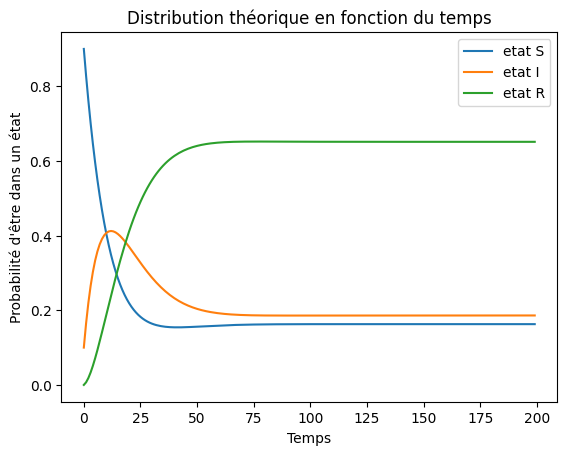

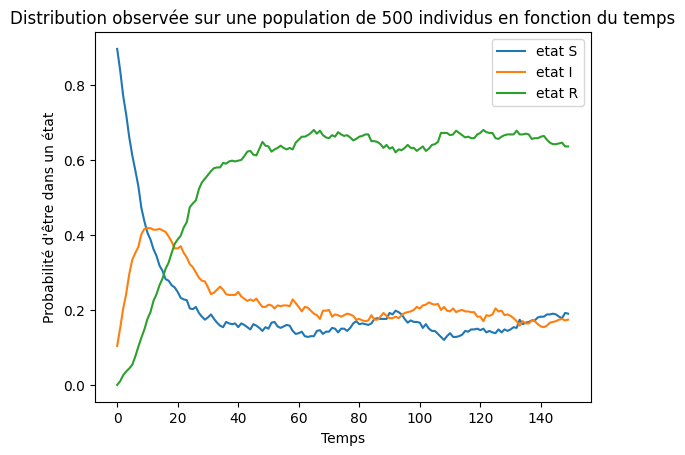

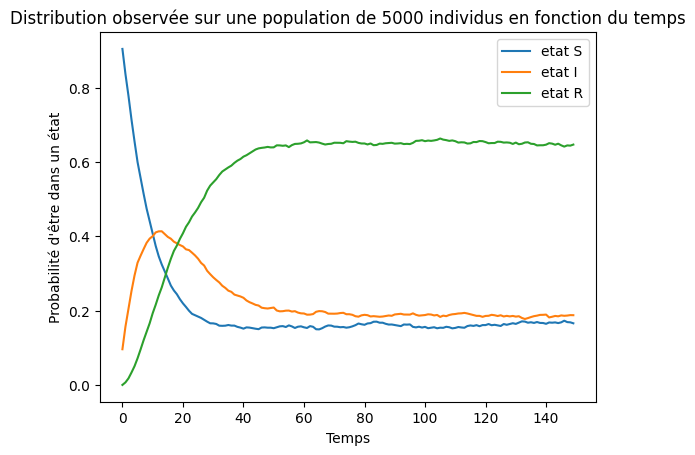

In [76]:
A2 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])

# Distribution théorique 
liste_distribution = distribution_etat(A2, pi0)
affichage_distribution(liste_distribution, 'Distribution théorique en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()

# Distribution observée, simulation avec une population 500 et 5000
affichage_distribution(simulation(500, 150, A2),'Distribution observée sur une population de 500 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()
affichage_distribution(simulation(5000, 150, A2),'Distribution observée sur une population de 5000 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()

5. En réalisant des nouvelles simulations avec la nouvelle matrice de transition, nous remarquons qu'avec le temps, la probabilité d'être Sain ou Infecté se stabilise autour de 0.2, contrairement aux simulations précédentes dans lesquelles ces probabilités devenaient nulles. La probabilité d'être dans l'état Guéri reste relativement élevé mais ne vaut plus 1. Cela revient au fait que les individus guéris peuvent redevenir sains avec
une probabilité de 0.02. Donc au fil du temps, la majorité des individus seront guéris, mais certains redeviennet sains en perdant leur immunité face à la maladie, et potentiellement deviennent infectés.

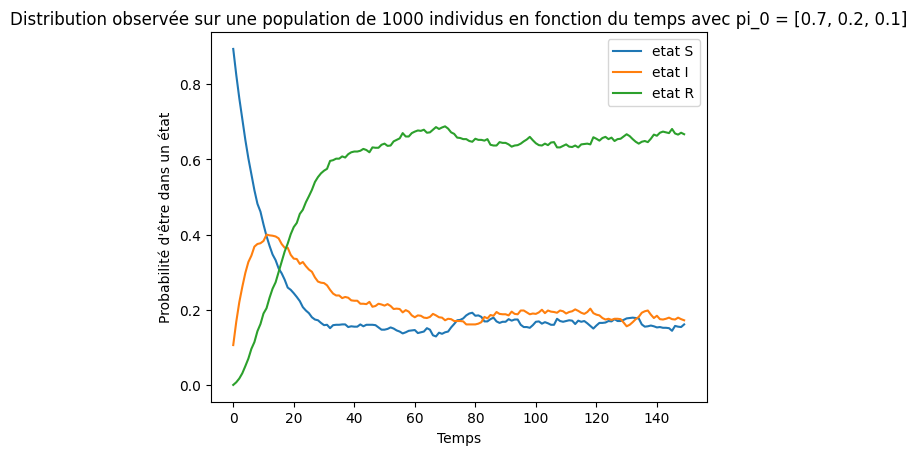

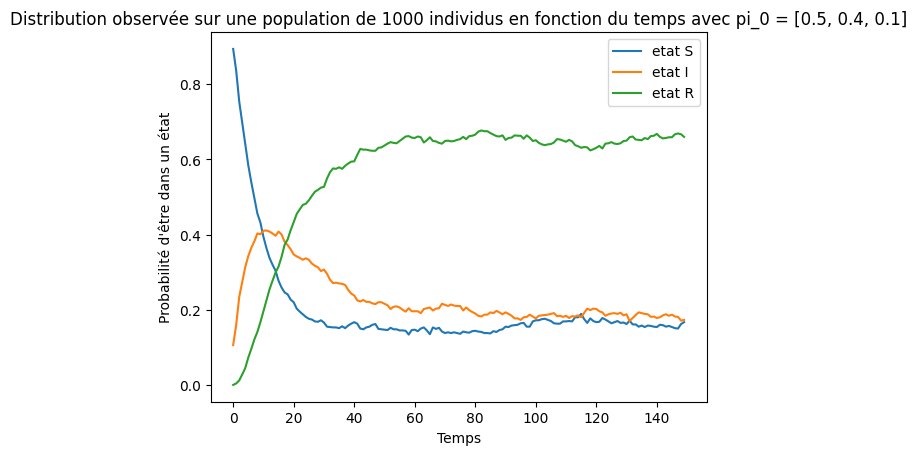

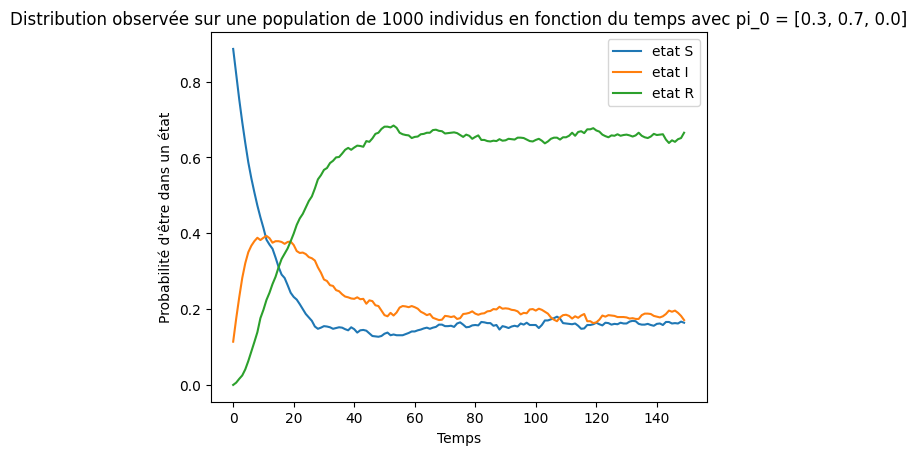

In [79]:
# changement des probas initiales
pi_0 = [0.7, 0.2, 0.1]
affichage_distribution(simulation(1000, 150, A2), 'Distribution observée sur une population de 1000 individus en fonction du temps avec pi_0 = [0.7, 0.2, 0.1]', 'Temps', "Probabilité d'être dans un état")
plt.show()

# changement des probas initiales
pi_0 = [0.5, 0.4, 0.1]
affichage_distribution(simulation(1000, 150, A2), 'Distribution observée sur une population de 1000 individus en fonction du temps avec pi_0 = [0.5, 0.4, 0.1]', 'Temps', "Probabilité d'être dans un état")
plt.show()

# changement des probas initiales
pi_0 = [0.3, 0.7, 0.0]
affichage_distribution(simulation(1000, 150, A2), 'Distribution observée sur une population de 1000 individus en fonction du temps avec pi_0 = [0.3, 0.7, 0.0]', 'Temps', "Probabilité d'être dans un état")
plt.show()

6. Nous avons refait les simulations avec différentes distributions de probabilités intiales (pi0 = [0.7, 0.2, 0.1], pi0 = [0.5, 0.4, 0.1], pi0 = [0.3, 0.7, 0.0]). Nous remarquons que quelque soit la distribution des probabilités initiales, la chaîne de Markov converge toujours vers les mêmes valeurs. Cela revient au fait que la chaîne est érgodique (deja démontré) et donc elle converge toujours vers l'unique distribution stationnaire pout toutes distributions des probabilités initiales.

7. Pour trouver la distribution de probabilité stationnaire il faut trouver pi tel que pi.A = pi. <br>
Nous résolvons le système à 3 inconnus (a,b,c) avec a+b+c=1 et nous trouvons pi = [$7/{43}$, $8/{43}$, $28/{43}$] = [0.163, 0.186, 0.651]. La distribution somme bien à 1.<br>
En effectuant des simulations avec t = 500 et t = 1000, nous remarquons que la chaîne de Markov converge effectivement vers pi, avec S qui converge vers 0.163, I vers 0.186 et R vers 0.651.


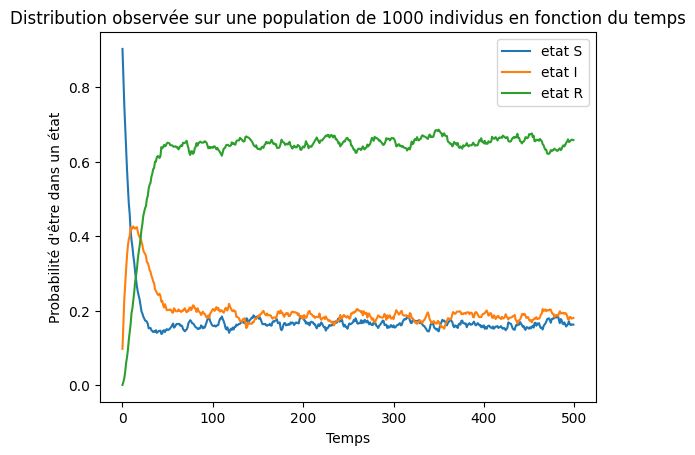

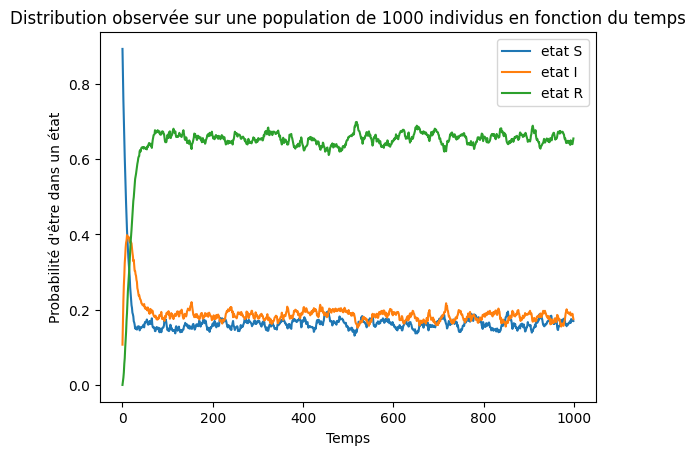

In [82]:
# Distribution observée, simulation avec t = 500 et t = 1000
affichage_distribution(simulation(1000, 500, A2), 'Distribution observée sur une population de 1000 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()
affichage_distribution(simulation(1000, 1000, A2), 'Distribution observée sur une population de 1000 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")
plt.show()

### 2.2 Longueur de l'immunité

1. Estimation de la longueur moyenne d'une séquence de R

In [94]:
def longueur_R_obs(nb_individus, T):
    """
    Estime la longueur moyenne d'une séquence de R consécutifs pour une population observée

    Parameters
    ----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)

    Returns
    -------
    la moyenne, liste du nombre de I consécutifs de chaque individu
    """
    I_moyen = []
    pop = seq_alea_population(nb_individus, T, pi0, A2)
    nb_R = 0
    
    # On parcours la population individu par individu
    # Autrement dit, on parcourt la liste de population de gauche à droite 
    # et de haut en bas (pour la liste 2d représentant cette dernière)

    for k in range(T * nb_individus) :
        i = k // T # indice de i
        j = k % T # indice de j

        if pop[i][j] == 'R': # on regarde l'élement actuel et on incrémente si c'est R
            nb_R += 1
            if pop[i][j+1] != 'R': # on regarde l'élément suivant et si != R, on ajoute la longueur trouvée dans la liste
                I_moyen.append(nb_R)
                nb_R = 0

    return statistics.mean(I_moyen), I_moyen

print(longueur_R_obs(150, 200))

(44.661417322834644, [20, 18, 43, 3, 26, 30, 27, 25, 10, 26, 29, 99, 1, 39, 2, 5, 1, 26, 16, 51, 299, 76, 33, 95, 1, 5, 51, 1, 1, 120, 12, 1, 154, 39, 92, 69, 69, 10, 26, 56, 50, 10, 15, 129, 70, 88, 5, 3, 25, 44, 36, 26, 31, 31, 19, 75, 40, 16, 51, 63, 140, 3, 38, 12, 9, 49, 18, 5, 81, 35, 19, 22, 89, 45, 45, 30, 21, 31, 10, 28, 18, 31, 108, 58, 36, 16, 53, 26, 16, 34, 15, 142, 57, 5, 28, 17, 53, 85, 31, 18, 65, 5, 119, 15, 6, 2, 53, 8, 68, 37, 54, 31, 33, 111, 13, 21, 25, 30, 75, 1, 34, 1, 51, 38, 38, 5, 65, 15, 38, 6, 28, 112, 72, 93, 17, 44, 32, 137, 177, 17, 51, 8, 99, 34, 1, 24, 5, 77, 3, 205, 84, 49, 95, 24, 4, 62, 4, 7, 7, 161, 40, 86, 6, 87, 3, 11, 2, 5, 47, 91, 26, 3, 21, 8, 60, 76, 55, 12, 42, 15, 45, 9, 12, 21, 10, 25, 20, 123, 106, 18, 36, 33, 144, 14, 20, 9, 51, 106, 55, 60, 46, 23, 42, 100, 8, 70, 53, 11, 5, 9, 8, 65, 118, 25, 119, 13, 78, 6, 87, 31, 57, 23, 63, 5, 68, 168, 37, 10, 7, 24, 30, 183, 92, 3, 19, 108, 25, 7, 5, 41, 19, 16, 17, 66, 63, 57, 96, 88, 46, 137, 56,

La longueure moyenne d'une séquence de R est comprise entre 47 et 51 la majorité du temps.

2. Estimation de la longueur théorique d'une séquence de R

On peut modéliser la longueur théorique d'une séquence de R par une loi géométrique de paramètre 0,02.

En effet, pour calculer la longueur théorique d'une séquence R, on cherche à estimer la probabilité de passer de R vers S en étant dans R. C'est la probabilité de succès.


En posant L, la variable aléatoire représentant la longueur d'une séquence R, on observe

P(L=1) = P(S|R) = 0.02 (être dans l'état R une seule fois) 

P(L=2) = P(R|R) x P(S|R) = 0.98 x 0.02 (être dans l'état R deux fois de suite)

P(L=3) = $P(R|R)^2$ x P(S|R) = $0.98^2$ x 0.02 (être dans l'état R trois fois de suite)

P(L=k) = $P(R|R)^{k-1} $ x P(S|R) = $0.98^{k-1}$ x 0.02 (être dans l'état R k fois de suite)



Pour trouver la moyenne de la longueur théorique, on calcule donc l'espérance de la loi géométrique de paramètres 0.02.

$Longueur moyenne = 1/0.02 = 50$


3. Affichage de la distribution théorique et de la distribution observée de la longueur de l'immunité

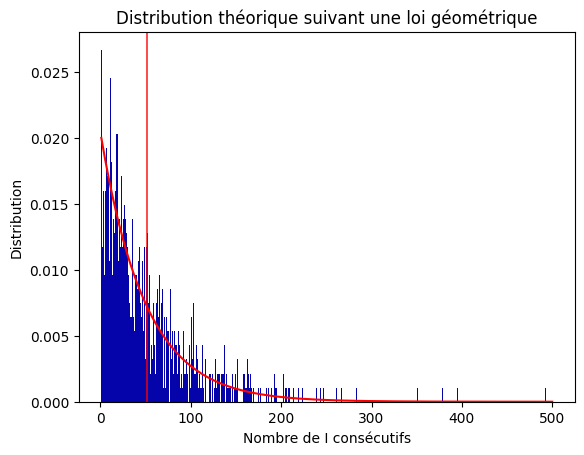

In [95]:
def courbe_dist_observee(nb_individus, T):
    """
    Affiche la coubre de la distribution observée des séquences de R

    Parameters
    ----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)
    """
    moyenne ,occurrences = longueur_R_obs(nb_individus, T)
    plt.axvline(moyenne, color='g', linewidth=0.5, label="Moyenne observée de la longueur de l'immunité") #moyenne observée
    plt.hist(occurrences, bins=max(occurrences), density=True, color='#0504aa')

#On effectue des distributions sur des populations de grandeur élevée pour pouvoir comparer les deux distributions
courbe_dist_theorique(500, 0.02)  #distribution théorique
courbe_dist_observee(150, 500) #distribution observée


Les distributions théorique et observée se superposent étroitement. Ceci indique que la probabilité de transition de l'état Guéri (R) à l'état de Sain (S) suit effectivement une loi géométrique.

### 2.3 Modification du modèle

1. Evolution du modèle en changeant la probabilité P(I | S):
Dans cette question, on modifie le modèle en modifiant pour un individu sain la probabilité de devenir infecté

Prenons par exemple: 

``` python
    A3 = np.array([
        [0.6, 0.4, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
```

La nouvelle distribution de la population est 

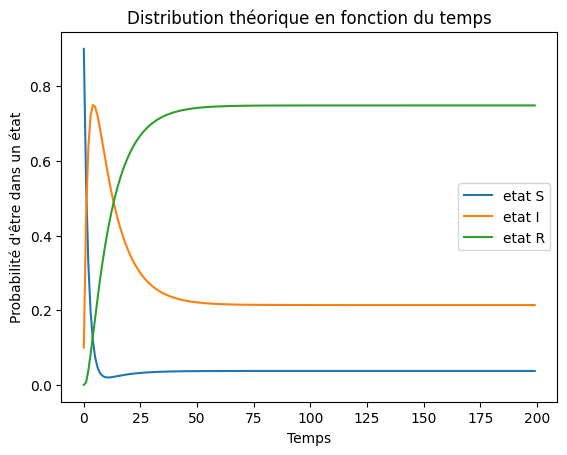

In [96]:
A3 = np.array([
        [0.6, 0.4, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
affichage_distribution(distribution_etat(A3, pi0), 'Distribution théorique en fonction du temps', 'Temps', "Probabilité d'être dans un état")

La nouvelle distribution converge vers: $[7/187, 40/187, 140/187]$ qui est obtenue en résolvant les équations linéaires telles que pi * A3 = pi,
comme la chaîne associé à A3 est bien érgodique. Nous avons augmenté la probabilité de devenir infecté si on est sain, et donc la courbe associée aux infectés converge vers une valeur plus importante, et celle des sains vers une qui est plus faible.

2. Evolution du modèle en changeant la probabilité P(S | R):<br>
Dans cette question, on modifie le modèle en modifiant pour un individu guéri la probabilité de devenir sain

Prenons par exemple: 

``` python
    A4 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.2, 0, 0.8]
    ])
```

La nouvelle distribution de la population est 

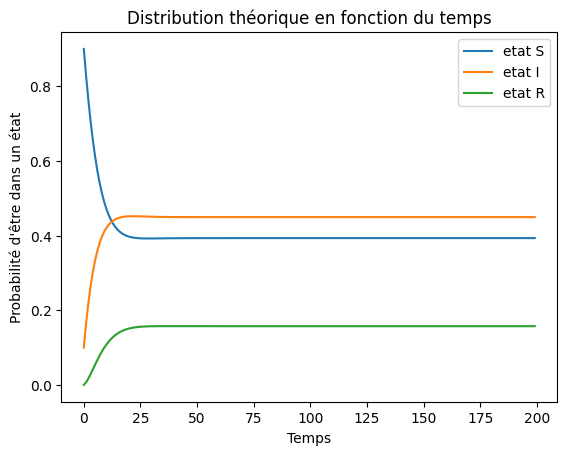

In [97]:
A4 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.2, 0, 0.8]
    ])
affichage_distribution(distribution_etat(A4, pi0), 'Distribution théorique en fonction du temps', 'Temps', "Probabilité d'être dans un état")

La nouvelle distribution à l'équilibre est: $[35/89, 40/89, 14/89]$ qui est obtenue en résolvant les équations linéaires telles que pi * A4 = pi (A4 érgodique). Nous avons augmenté la probabilité de perdre l'immunité, donc il y aura plus de personnes qui redeviennet sains, et donc s'infectent potentiellement, ce qui explique la convergence des infectés vers la valeur la plus élevée, et celle des rétablis vers la plus faible.

## 3. Vaccination

### 3.1 Questions rapides
1. Par rapport au modèle précédent, on remarque que la probabilité d'être dans l'état S et de passer dans l'état I devient plus faible et que la probabilité de rester dans l'état I a également diminué (en changeant aussi la probabilité de passer vers l'état R). De plus, la vaccination permet la passage de Sain à Guéri possible en donnant les individus une immunité.
De ce fait, la distribution de la population dans l'état I diminue.

2. Représentation graphique de la distribution théorique

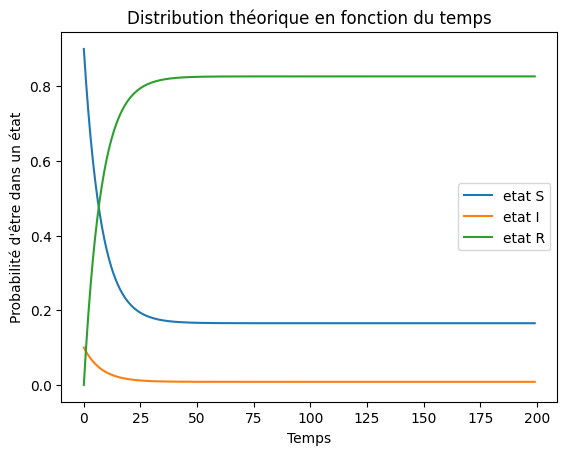

In [98]:
MatriceVaccin = np.array(
                        [[0.9 , 0.01, 0.09], 
                         [0. , 0.8 , 0.2 ], 
                         [0.02, 0. , 0.98]])

affichage_distribution(distribution_etat(MatriceVaccin, pi0), 'Distribution théorique en fonction du temps', 'Temps', "Probabilité d'être dans un état")

3. Comparaison des distributions stationnaires

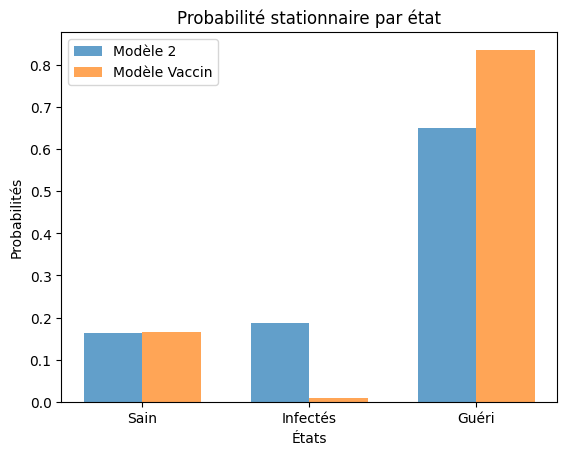

In [103]:
def comp_dist_stationnaires():
    """
    Affiche un histogramme comparant deux distributions stationnaires
    """
    # par résolution manuelle, on a trouvé :
    stationnaire1 = [0.163, 0.186, 0.651]
    stationnaire2 = [0.165, 0.008, 0.836]

    # États
    etats = ['Sain', 'Infectés', 'Guéri']

    # Largeur des barres
    largeur = 0.35

    # Position des barres
    pos1 = np.arange(len(etats))
    pos2 = pos1 + largeur

    # Créer des barres pour chaque état
    plt.bar(pos1, stationnaire1, width=largeur, alpha=0.7, label='Modèle 2')
    plt.bar(pos2, stationnaire2, width=largeur, alpha=0.7, label='Modèle Vaccin')

    plt.xticks(pos1 + largeur / 2, etats)
    # Légendes
    plt.xlabel('États')
    plt.ylabel('Probabilités')
    plt.title('Probabilité stationnaire par état')
    plt.legend()

    # Affichage
    plt.show()


comp_dist_stationnaires()

Cet histogramme montre que la probabilité stationnaire de I est plus faible avec le modele Vaccin, et celle de R est plus importante. Cela signifie qu'avec la vaccination, le taux d'infectés baisse significativement, et le taux d'immunité augmente chez les individus.

In [25]:
def proba_seq(sequence, modele, pi_0) :
    """
    Calcule la probabilité d'obtenir une séquence donnée sachant un modele

    Parameters
    ----------
    sequence : séquence d'états ( 0 : Sain, 1 : Infecté, 2 : Guéri)
    modele : modele étudié (matrice de transition)
    pi_0 : vecteur de probabilités initiales

    Returns 
    -------
    res : la probabilité d'obtenir séquence
    """
    etat_init = sequence[0]  # on recupere l'indice du tout premier état
    res = pi_0[etat_init]  # on commence par la probabilité initiale
    for i in range(1,len(sequence)) :
        etat_prec = sequence[i-1] # etat a l'instant i-1
        etat_pres =  sequence[i] # etat actuel
        res *= modele[etat_prec][etat_pres]
    return res 

# Exemple d'utilisation
sequence = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
p_A2 = proba_seq(sequence, A2, pi0)
p_vacc = proba_seq(sequence, MatriceVaccin, pi0)
print(p_A2)
print(p_vacc)

1.821844184894589e-10
1.77344517220619e-12


3. La probabilité d'obtenir cette séquence sachant le modèle 2 est : 1.821 x $10^{-10}$.<br>
La probabilité d'obtenir cette séquence sachant le modèle vaccin est : 1.773 x $10^{-12}$.<br>
La probabilité est plus importante sachant le modèle 2, donc nous estimons que l'individu n'a pas été vacciné.

## 4. Confinement

Nombre de confinement :  3
Nombre de déconfinement :  3


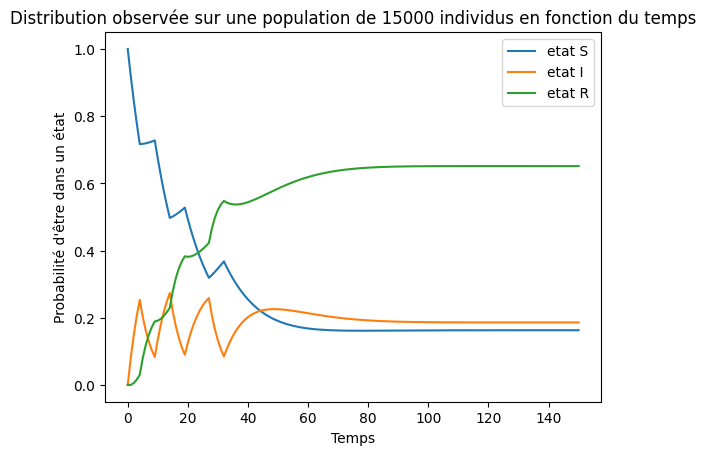

In [112]:
def simulation(nb_individus, T):
    """
    Simule une expéerience avec une population en utilisant des mesures de distanciations sociales .

    Parameters
    -----------
    nb_individus : taille de la population
    T : taille des séquences (le temps)

    Returns
    -------
    pop :  liste de la distribution de la population pour chaque temps t
    nb_confinement : nombre total de confinement
    nb_deconfinement nombre total de déconfinement
    """
    nb_confinement : int = 0 # nombre de périodes de confinement
    nb_deconfinement : int = 0 # nombre de périodes de déconfinement
    is_confinement = False # vaut True si on est en confinement et false sinon

    pop = [] # liste de la distribution de la population pour chaque temps t
    pop.append(np.array([1, 0, 0])) #initialisation avec [1, 0, 0] car tous les individus sont sains au début

    sequence = [] # séquence générée pour chaque individu de la population en fonction de la distribution calculée

    MatriceConf = np.array(
                        [[1 , 0., 0.], 
                         [0. , 0.8 , 0.2 ], 
                         [0.02, 0. , 0.98]]) # nouvelle matrice telle que P(S->I) = 0
    
    M = A2 # Matrice initialisée avec A2 au début pour la multiplication

    # Calcul de la distribution de la population pour chaque temps + nb de confinements
    for t in range(T):
        last_dist = pop[len(pop)-1] # distribution calculée pour le rang précédent dans la liste

        # Génère une population en fonction des distribution trouvées
        for ind in range(nb_individus):
            sequence.append(random.choices(['S', 'I', 'R'], [last_dist[0], last_dist[1], last_dist[2]]))

        # mise en confinement si le nombre d'individus infectés >= 25%
        if last_dist[1] >= 0.25:
            M = MatriceConf 
            if not is_confinement: # Si on n'est pas en confinement, on incrémente le nb de confinements et on se met en confinement
                nb_confinement += 1
                is_confinement = True 

        # déconfinement si le nombre d'individus infectés < 10%
        if last_dist[1] < 0.1:
            M = A2
            if is_confinement: # si on est en confinement, on se déconfine et on incrémente le nombre de déconfinement
                nb_deconfinement += 1
                is_confinement = False 

        pop.append(np.dot(last_dist, M)) # on multiplie la dernière distribution de la population par la matrice actuellement en vigueur A2 -> deconf et MatriceConf -> Confinement

    return pop, nb_confinement, nb_deconfinement

population = simulation(15000, 150)
print("Nombre de confinement : ",population[1])
print("Nombre de déconfinement : ",population[2])
affichage_distribution(population[0], 'Distribution observée sur une population de 15000 individus en fonction du temps', 'Temps', "Probabilité d'être dans un état")

En faisant des simulations pour une population de 15000 individus, le nombre de confinement et déconfinement est 3. Cela signifie qu'il nécessite 3 cycles de confinement/déconfinement pour que moins de 10% de la population soit infecté.

## 5. Discussion

1. Les modèles utilisés ne prennent pas en considération les variations de la maladie, telles que l'évolution des probabilités d'infection au fil du temps ou leur variation en fonction de la taille de la population, etc. Ces modèles s'avèrent efficaces lorsque les probabilités de transition restent constantes tout au long de l'évolution de la maladie.